# **Classification**

In [ ]:
#! pip install numpy pandas matplotlib sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
y_train = pd.read_csv("Y_train.csv")
y_valid = pd.read_csv("Y_valid.csv")
y_train.info()
index = "_less_std"
X_train = pd.read_csv("X_train_less_std.csv") # index_col = [0]
X_valid = pd.read_csv("X_valid_less_std.csv")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mort_icu  16760 non-null  int64
dtypes: int64(1)
memory usage: 131.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Columns: 252 entries, glucose_mean to venous pvo2_std
dtypes: float64(252)
memory usage: 32.2 MB


In [ ]:
X_train

,glucose_mean,glucose_mask,glucose_std,hematocrit_mean,hematocrit_mask,hematocrit_std,sodium_mean,sodium_mask,sodium_std,creatinine_mean,...,pulmonary capillary wedge pressure_std,troponin-i_mean,troponin-i_mask,troponin-i_std,total protein urine_mean,total protein urine_mask,total protein urine_std,venous pvo2_mean,venous pvo2_mask,venous pvo2_std
0,1.418719,9.0,1.076274,-0.298192,8.0,0.333588,0.116384,4.0,0.233026,0.758056,...,0.262035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.121306,4.0,0.656569,-0.508087,7.0,0.499739,-0.663649,2.0,0.281324,6.011407,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.120647,5.0,0.200602,1.538661,3.0,0.529781,-0.155601,3.0,0.277340,-0.080335,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.181780,5.0,0.178082,1.074263,2.0,0.138791,0.537192,2.0,0.070331,-0.481182,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.224608,17.0,0.732274,0.217202,6.0,0.714622,1.153008,3.0,0.312954,-0.006940,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,-0.921706,3.0,0.091842,0.481108,3.0,0.115233,-0.163299,3.0,0.229925,-0.021055,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16756,-0.880855,2.0,0.026787,-0.404767,2.0,0.040845,0.311393,2.0,0.034773,-0.005058,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16757,-0.694309,8.0,0.142101,-0.166299,6.0,0.446349,-0.402697,5.0,0.184019,-0.009763,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16758,-0.056593,7.0,0.386438,-0.520022,2.0,0.278814,0.945170,4.0,0.187238,-0.173489,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dtc = DecisionTreeClassifier(max_depth=1, random_state=1)
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=260, learning_rate=0.25, random_state=1)
abc=abc.fit(X_train, y_train)
y_train_pred = abc.predict(X_train)
y_valid_pred = abc.predict(X_valid)
# y_test_pred = abc.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)

print("Accuracy on training set", accuracy_train)
print("Accuracy on valid set", accuracy_valid)

Accuracy on training set 0.9408114558472553
Accuracy on valid set 0.9431913116123642


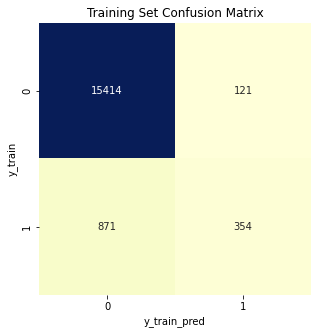

In [ ]:
train_matrix = confusion_matrix(y_train, y_train_pred)
# valid_matrix = confusion_matrix(y_valid, y_valid_pred)

plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
sns.heatmap(train_matrix, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel("y_train_pred")
plt.ylabel("y_train")
plt.title("Training Set Confusion Matrix")

# plt.subplot(1,2,2)
# sns.heatmap(valid_matrix, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
# plt.xlabel("y_valid_pred")
# plt.ylabel("y_valid")
# plt.title("Validation Set Confusion Matrix")

plt.show()

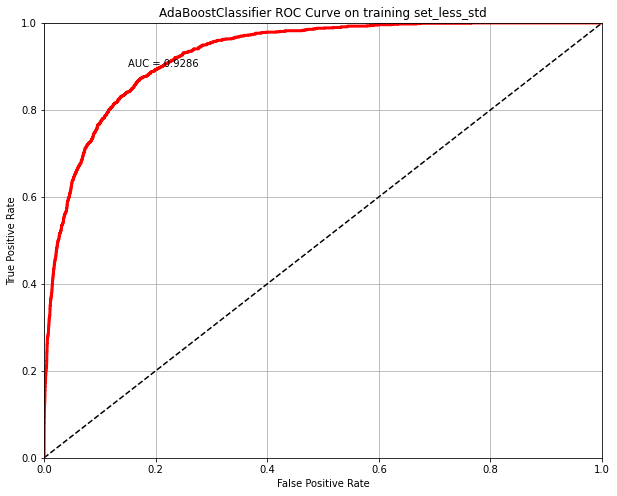

In [ ]:
y_train_scores = abc.predict_proba(X_train)[:, 1]
fpr, tpr, threshold = roc_curve(y_train, y_train_scores)
auc_train = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, "r", linewidth=3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoostClassifier ROC Curve on training set" + index)
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.15, 0.9, "AUC = " + str (round (auc_train, 4)))
plt.show()

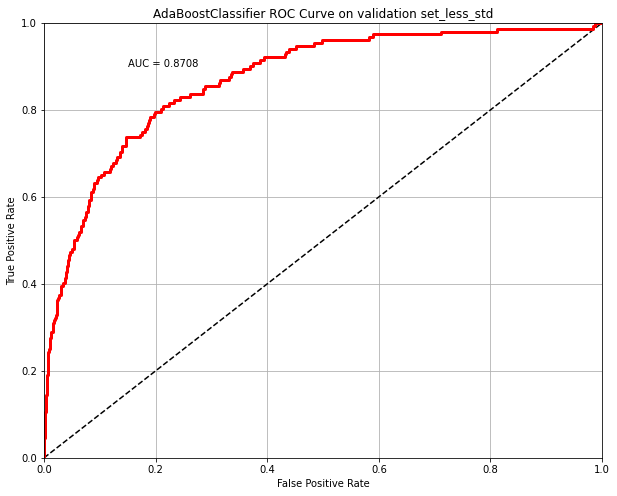

In [ ]:
y_valid_scores = abc.predict_proba(X_valid)[:, 1]
fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
auc_valid = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, "r", linewidth=3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoostClassifier ROC Curve on validation set"+index)
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.15, 0.9, "AUC = " + str (round (auc_valid, 4)))
plt.show()

In [ ]:
df = pd.DataFrame (y_train_scores, columns=["mort_icu"])
df.to_csv('Y_Train_AdaBoost'+index+'.csv')
df = pd.DataFrame (y_valid_scores, columns=["mort_icu"])
df.to_csv('Y_Valid_AdaBoost'+index+'.csv')

# **Tune Hyperparameters**

In [ ]:
def Max_Depth (X_train, X_valid, y_train, y_valid, maxdepth):
  # Analysis on maxdepth effect on training & validation accuracy
  auc_list = []
  for depth in maxdepth:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=1)
    abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=75, learning_rate=0.25, random_state=1)
    abc=abc.fit(X_train, y_train)
    y_train_pred = abc.predict(X_train)
    y_valid_pred = abc.predict(X_valid)
    # y_test_pred = abc.predict(X_test)
    y_valid_scores = abc.predict_proba(X_valid)[:, 1]
    fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
    auc_valid = auc(fpr, tpr)
    auc_list.append(auc_valid)
  return auc_list

In [ ]:
# Analysis on maxdepth effect on training & validation accuracy
def Learning_Rate (X_train, X_valid, y_train, y_valid, learning_rate):
  auc_list = []
  for alpha in learning_rate:
    dtc = DecisionTreeClassifier(max_depth=1, random_state=1)
    abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=75, learning_rate=alpha, random_state=1)
    abc=abc.fit(X_train, y_train)
    y_train_pred = abc.predict(X_train)
    y_valid_pred = abc.predict(X_valid)
    # y_test_pred = abc.predict(X_test)
    y_valid_scores = abc.predict_proba(X_valid)[:, 1]
    fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
    auc_valid = auc(fpr, tpr)
    auc_list.append(auc_valid)
  return auc_list

In [ ]:
def num_estimators (X_train, X_valid, y_train, y_valid, estimator):
  # Analysis on maxdepth effect on training & validation accuracy
  auc_list = []
  for e in estimator:
    dtc = DecisionTreeClassifier(max_depth=1, random_state=1)
    abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=e, learning_rate=0.25, random_state=1)
    abc=abc.fit(X_train, y_train)
    y_valid_scores = abc.predict_proba(X_valid)[:, 1]
    fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
    auc_valid = auc(fpr, tpr)
    auc_list.append(auc_valid)
  return auc_list

In [ ]:
def Visualization (para_list, auc_list, para_name):
  plt.figure(figsize=(10,6))
  plt.plot(para_list, auc_list, "r-o")
#  plt.plot(para_list, valid_acc, "b-s", label = "Validation Set")
  plt.xticks (para_list, para_list)
  plt.grid()
  plt.legend()
  plt.text(str (round (auc_valid, 4)))
  plt.xlabel(para_name)
  plt.ylabel("AUC")
  plt.title("AdaBoostClassifier Accuracy vs " + str(para_name))
  plt.show()

# **Hyperparameters**

## **Max_Depth**

In [ ]:
maxdepth = np.arange(1, 6)
auc_list = Max_Depth (X_train, X_valid, y_train, y_valid, maxdepth)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
auc_list

[0.8735709422977604,
 0.8540424433071975,
 0.7775746513920841,
 0.7102768909338466,
 0.602716089957275]

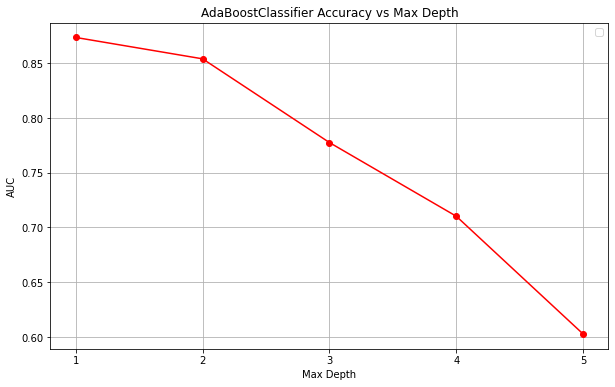

In [ ]:
Visualization (maxdepth, auc_list, "Max Depth") 

## **Learning Rate**

In [ ]:
learning_rate = np.arange(0.1, 0.35, 0.05)
auc_list = Learning_Rate (X_train, X_valid, y_train, y_valid, learning_rate)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
auc_list

[0.8552030024883799,
 0.8635895464575801,
 0.8678400394384712,
 0.8735709422977604,
 0.8727258321986948]

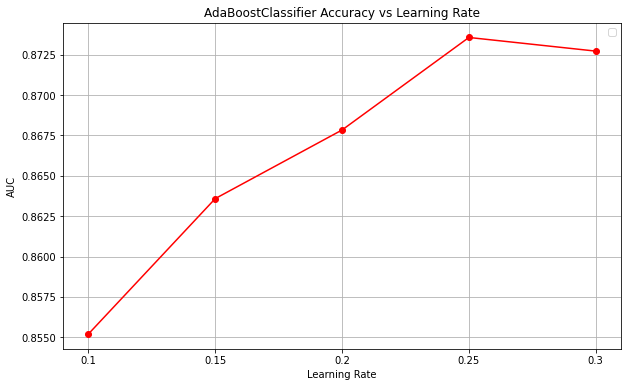

In [ ]:
Visualization (learning_rate.round(4), auc_list, "Learning Rate") 

## **Estimators**

In [ ]:
estimator = np.arange(50, 90, 10)
auc_list = num_estimators (X_train, X_valid, y_train, y_valid, estimator)
print (auc_list)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.8672091412742382, 0.8686484694117095, 0.8705617047748722, 0.8748972956476829]


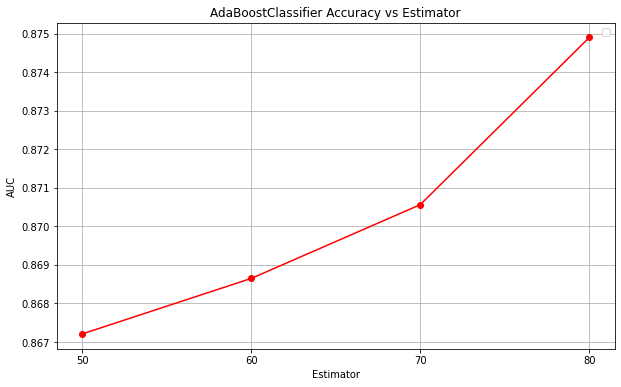

In [ ]:
Visualization (estimator, auc_list, "Estimator") 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.8705617047748722, 0.8748972956476829, 0.8758979294802572, 0.875850978919198, 0.8755047185313864, 0.8776732475703086, 0.8767899901403822]


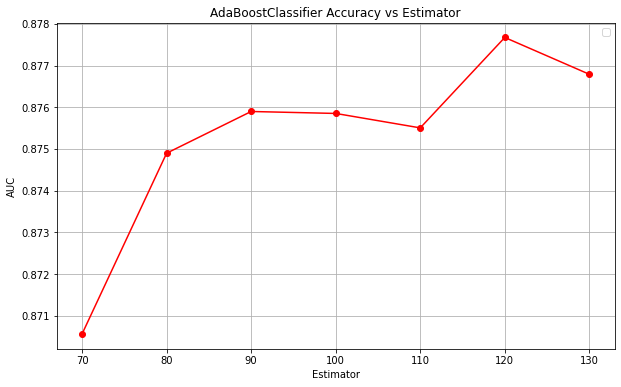

In [ ]:
estimator = np.arange(70, 140, 10)
auc_list = num_estimators (X_train, X_valid, y_train, y_valid, estimator)
print (auc_list)
Visualization (estimator, auc_list, "Estimator") 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.8788323395464577, 0.8785623738203672, 0.8797332034367812, 0.8804580027231327, 0.8802995445795578, 0.879935677731349]


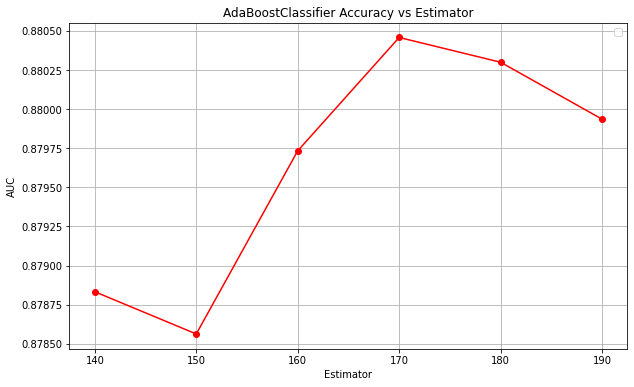

In [ ]:
estimator = np.arange(140, 200, 10)
auc_list = num_estimators (X_train, X_valid, y_train, y_valid, estimator)
print (auc_list)
Visualization (estimator, auc_list, "Estimator") 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.8797332034367812, 0.8804580027231327, 0.8802995445795578, 0.879935677731349, 0.8800383820836659, 0.8805254941546552, 0.8802173810977041, 0.8801909714071083, 0.881285506361801, 0.8811769331893515, 0.8818401098643127, 0.8808834921827315, 0.8793575989483075, 0.8786357340720221, 0.8779549509366638, 0.8768281374712427, 0.8774179538945491, 0.8766608760974693, 0.8768868256725667, 0.8777201981313676]


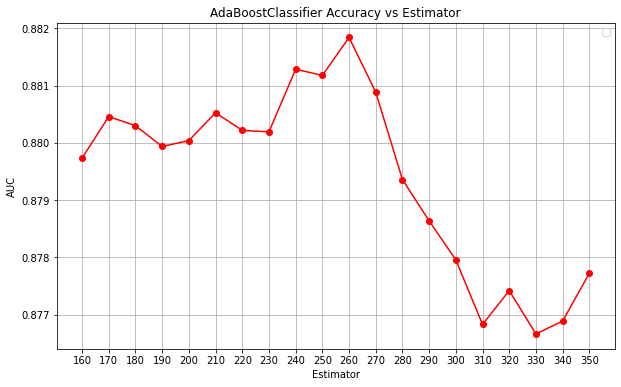

In [ ]:
estimator = np.arange(160, 360, 10)
auc_list = num_estimators (X_train, X_valid, y_train, y_valid, estimator)
print (auc_list)
Visualization (estimator, auc_list, "Estimator") 

# **Train on the whole dataset**

In [ ]:
max_depth=1
n_estimators=260
learning_rate=0.25

In [ ]:
y_train = pd.read_csv("Y_train.csv")
y_valid = pd.read_csv("Y_valid.csv")
y_train.info()

X_train = pd.read_csv("aggregated_features_table_train_1.csv") # index_col = [0]
X_valid = pd.read_csv("aggregated_features_table_valid_1.csv")
X_test = pd.read_csv("aggregated_features_table_test_1.csv")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mort_icu  16760 non-null  int64
dtypes: int64(1)
memory usage: 131.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Columns: 312 entries, glucose_mean to creatinine body fluid_time
dtypes: float64(208), int64(104)
memory usage: 39.9 MB


In [ ]:
X_total=pd.concat([X_train, X_valid])
y_total=pd.concat([y_train, y_valid])
X_total.shape

(19154, 312)

In [ ]:
dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
abc=abc.fit(X_total, y_total)
y_test_pred = abc.predict(X_test)
y_test_scores = abc.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df = pd.DataFrame (y_test_scores, columns=["mort_icu"])
df.to_csv('Y_Test_AdaBoost.csv')

In [ ]:
# Testing 
y_valid_scores = abc.predict_proba(X_valid)[:, 1]
fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
auc_valid = auc(fpr, tpr)
df = pd.DataFrame (y_valid_scores, columns=["mort_icu"])
df.to_csv('Y_Valid_AdaBoost.csv')
auc_valid

0.8918845955209164

# **Analysis on hyperparameters**

# **K-Fold Validation**

## 1. Analysis on max_depth -> Max_depth = 1

In [ ]:
kf = KFold(n_splits=5)
maxdepth = np.arange(1, 11)
K = 1
train_acc_total = pd.DataFrame(index = maxdepth, columns = [1, 2, 3, 4, 5])
valid_acc_total = pd.DataFrame(index = maxdepth, columns = [1, 2, 3, 4, 5])
for train_index, test_index in kf.split(X_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_1, X_test_1 = X_train.loc[train_index, :], X_train.loc[test_index, :]
  print (X_train_1.shape, X_test_1.shape)
  y_train_1, y_test_1 = y_train.loc[train_index, :], y_train.loc[test_index, :]
  train_acc = []; valid_acc = []
  train_acc, valid_acc = Max_Depth (X_train_1, X_test_1, y_train_1, y_test_1, maxdepth)
  train_acc_total[K] = train_acc; valid_acc_total[K] = valid_acc
  K += 1

In [ ]:
train_acc_total

In [ ]:
Visualization (maxdepth, train_acc_total.mean(axis=1), valid_acc_total.mean(axis=1), "Max Depth") 

## 2. Analysis on learning rate

In [ ]:
kf = KFold(n_splits=5)
maxdepth = np.arange(1, 11)
K = 1
learning_rate = np.arange(0.05, 1, 0.05)
train_acc_total = pd.DataFrame(index = learning_rate, columns = [1, 2, 3, 4, 5])
valid_acc_total = pd.DataFrame(index = learning_rate, columns = [1, 2, 3, 4, 5])
for train_index, test_index in kf.split(X_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_1, X_test_1 = X_train.loc[train_index, :], X_train.loc[test_index, :]
  print (X_train_1.shape, X_test_1.shape)
  y_train_1, y_test_1 = y_train.loc[train_index, :], y_train.loc[test_index, :]
  train_acc = []; valid_acc = []
  train_acc, valid_acc = Learning_Rate (X_train_1, X_test_1, y_train_1, y_test_1, learning_rate)
  train_acc_total[K] = train_acc; valid_acc_total[K] = valid_acc
  K += 1

In [ ]:
train_acc_total

In [ ]:
Visualization (learning_rate.round(2), train_acc_total.mean(axis=1), valid_acc_total.mean(axis=1), "Learning Rate") 

In [ ]:
kf = KFold(n_splits=5)
maxdepth = np.arange(1, 11)
K = 1
learning_rate = np.arange(0.01, 0.05, 0.01)
train_acc_total = pd.DataFrame(index = learning_rate, columns = [1, 2, 3, 4, 5])
valid_acc_total = pd.DataFrame(index = learning_rate, columns = [1, 2, 3, 4, 5])
for train_index, test_index in kf.split(X_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_1, X_test_1 = X_train.loc[train_index, :], X_train.loc[test_index, :]
  print (X_train_1.shape, X_test_1.shape)
  y_train_1, y_test_1 = y_train.loc[train_index, :], y_train.loc[test_index, :]
  train_acc = []; valid_acc = []
  train_acc, valid_acc = Learning_Rate (X_train_1, X_test_1, y_train_1, y_test_1, learning_rate)
  train_acc_total[K] = train_acc; valid_acc_total[K] = valid_acc
  K += 1

In [ ]:
Visualization (learning_rate.round(2), train_acc_total.mean(axis=1), valid_acc_total.mean(axis=1), "Learning Rate") 

In [ ]:
kf = KFold(n_splits=5)
maxdepth = np.arange(1, 11)
K = 1
learning_rate = np.arange(0.01, 0.005, 0.02)
train_acc_total = pd.DataFrame(index = learning_rate, columns = [1, 2, 3, 4, 5])
valid_acc_total = pd.DataFrame(index = learning_rate, columns = [1, 2, 3, 4, 5])
for train_index, test_index in kf.split(X_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_1, X_test_1 = X_train.loc[train_index, :], X_train.loc[test_index, :]
  print (X_train_1.shape, X_test_1.shape)
  y_train_1, y_test_1 = y_train.loc[train_index, :], y_train.loc[test_index, :]
  train_acc = []; valid_acc = []
  train_acc, valid_acc = Learning_Rate (X_train_1, X_test_1, y_train_1, y_test_1, learning_rate)
  train_acc_total[K] = train_acc; valid_acc_total[K] = valid_acc
  K += 1

In [ ]:
Visualization (learning_rate.round(2), train_acc_total.mean(axis=1), valid_acc_total.mean(axis=1), "Learning Rate") 